# Preparation

In [1]:
import pandas as pd
import numpy as np
from nltk.corpus import stopwords
import re
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
from nltk.stem import PorterStemmer
from nltk.stem import LancasterStemmer

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/indahrahma/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/indahrahma/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [2]:
import nltk
nltk.download('punkt')

import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS
import nltk
import re
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, sent_tokenize
import gensim
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS
# import keras
from tensorflow.keras.preprocessing.text import one_hot, Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Embedding, Input, LSTM, Conv1D, MaxPool1D, Bidirectional
from tensorflow.keras.models import Model

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/indahrahma/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


### Scrapping data

In [ ]:
# Creating list to append tweet data to
tweets_list1 = []

# Using TwitterSearchScraper to scrape data and append tweets to list
for i,tweet in enumerate(sntwitter.TwitterSearchScraper('janda').get_items()):
    if i>100:
        break
    tweets_list1.append([tweet.date, tweet.id, tweet.rawContent, tweet.user.username])
    
# Creating a dataframe from the tweets list above 
tweets_df1 = pd.DataFrame(tweets_list1, columns=['Datetime', 'Tweet Id', 'Text', 'Username'])


In [ ]:
# Creating list to append tweet data to
tweets_list2 = []

# Using TwitterSearchScraper to scrape data and append tweets to list
for i,tweet in enumerate(sntwitter.TwitterSearchScraper('lonte').get_items()):
    if i>100:
        break
    tweets_list1.append([tweet.date, tweet.id, tweet.rawContent, tweet.user.username])
    
# Creating a dataframe from the tweets list above 
tweets_df2 = pd.DataFrame(tweets_list2, columns=['Datetime', 'Tweet Id', 'Text', 'Username'])


In [ ]:
# Creating list to append tweet data to
tweets_list3 = []

# Using TwitterSearchScraper to scrape data and append tweets to list
for i,tweet in enumerate(sntwitter.TwitterSearchScraper('cabe-cabean').get_items()):
    if i>100:
        break
    tweets_list1.append([tweet.date, tweet.id, tweet.rawContent, tweet.user.username])
    
# Creating a dataframe from the tweets list above 
tweets_df3 = pd.DataFrame(tweets_list3, columns=['Datetime', 'Tweet Id', 'Text', 'Username'])


In [ ]:
# Creating list to append tweet data to
tweets_list4 = []

# Using TwitterSearchScraper to scrape data and append tweets to list
for i,tweet in enumerate(sntwitter.TwitterSearchScraper('digilir').get_items()):
    if i>100:
        break
    tweets_list1.append([tweet.date, tweet.id, tweet.rawContent, tweet.user.username])
    
# Creating a dataframe from the tweets list above 
tweets_df4 = pd.DataFrame(tweets_list4, columns=['Datetime', 'Tweet Id', 'Text', 'Username'])


In [ ]:
# Creating list to append tweet data to
tweets_list5 = []

# Using TwitterSearchScraper to scrape data and append tweets to list
for i,tweet in enumerate(sntwitter.TwitterSearchScraper('jablay').get_items()):
    if i>100:
        break
    tweets_list1.append([tweet.date, tweet.id, tweet.rawContent, tweet.user.username])
    
# Creating a dataframe from the tweets list above 
tweets_df5 = pd.DataFrame(tweets_list5, columns=['Datetime', 'Tweet Id', 'Text', 'Username'])

## Load Data

In [3]:
import pandas as pd

df = pd.read_csv("/Users/indahrahma/Downloads/bismillah.csv")


In [4]:
df

,Datetime,Tweet Id,Text,Username,Label
0,2023-02-22 03:01:28+00:00,1.630000e+18,"Dalam urusan cinta, jgn bereaksi terlalu berle...",infogarsela,No
1,2023-02-22 02:46:17+00:00,1.630000e+18,@treasuremenfess Cabe cabean wkwkwkkw,spitfaierdregen,No
2,2023-02-22 02:34:24+00:00,1.630000e+18,@treasuremenfess cabe cabean,haruwize,No
3,2023-02-22 02:29:23+00:00,1.630000e+18,"@jungnaa19 Istrinya dah tulus, malah cari cabe...",ryh_seven,No
4,2023-02-22 02:12:03+00:00,1.630000e+18,@flywithasoka @tanyakanrl Knp si cowo baik gin...,Itsyourqueens,No
...,...,...,...,...,...
401,2023-03-07 13:32:06+00:00,1.630000e+18,@_xlero Emg rada jablay sih tapi gmn yahhh,devilsmete,No
402,2023-03-07 13:27:48+00:00,1.630000e+18,"No offense, bodyshaming my ass idgaf. But dia ...",chionofille,Yes
403,2023-03-07 13:13:45+00:00,1.630000e+18,@vdlito eh jablay tbtb kangen mabar!! kmnsi loe,aquijat,Yes
404,2023-03-07 13:08:26+00:00,1.630000e+18,Coba kalau aku ‚Äöapaan si ni orang jablay bgt,tanahhhh_abang,No


In [5]:
df.duplicated(subset=["Text"]).sum()

0

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 406 entries, 0 to 405
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Datetime  406 non-null    object 
 1   Tweet Id  406 non-null    float64
 2   Text      406 non-null    object 
 3   Username  406 non-null    object 
 4   Label     406 non-null    object 
dtypes: float64(1), object(4)
memory usage: 16.0+ KB


In [7]:
df.describe()

,Tweet Id
count,4.060000e+02
mean,1.630000e+18
std,6.664212e+03
min,1.630000e+18
25%,1.630000e+18
50%,1.630000e+18
75%,1.630000e+18
max,1.630000e+18


In [8]:
df["Tweet Id"] = df["Tweet Id"].astype(str)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 406 entries, 0 to 405
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Datetime  406 non-null    object
 1   Tweet Id  406 non-null    object
 2   Text      406 non-null    object
 3   Username  406 non-null    object
 4   Label     406 non-null    object
dtypes: object(5)
memory usage: 16.0+ KB


## CLEANING DATA

### Case Folding

In [10]:
def clean_lower(lwr):
    lwr = lwr.lower() # lowercase text
    return lwr
# Buat kolom tambahan untuk data description yang telah dicasefolding  
df['lwr'] = df['Text'].apply(clean_lower)
casefolding=pd.DataFrame(df['lwr'])
casefolding

,lwr
0,"dalam urusan cinta, jgn bereaksi terlalu berle..."
1,@treasuremenfess cabe cabean wkwkwkkw
2,@treasuremenfess cabe cabean
3,"@jungnaa19 istrinya dah tulus, malah cari cabe..."
4,@flywithasoka @tanyakanrl knp si cowo baik gin...
...,...
401,@_xlero emg rada jablay sih tapi gmn yahhh
402,"no offense, bodyshaming my ass idgaf. but dia ..."
403,@vdlito eh jablay tbtb kangen mabar!! kmnsi loe
404,coba kalau aku ‚äöapaan si ni orang jablay bgt


### Filtering data

In [11]:
def filtering(review):
    # Remove link web
    review = re.sub(r'http\S+', '', review)
    # Remove @username
    review = re.sub('@[^\s]+', '', review)
    # Remove #tagger
    review = re.sub(r'#([^\s]+)', '', review)
    # Remove angka termasuk angka yang berada dalam string
    # Remove non ASCII chars
    review = re.sub(r'[^\x00-\x7f]', r'', review)
    review = re.sub(r'(\\u[0-9A-Fa-f]+)', r'', review)
    review = re.sub(r"[^A-Za-z0-9^,!.\/'+-=]", " ", review)
    review = re.sub(r'\\u\w\w\w\w', '', review)
    # Remove simbol, angka dan karakter aneh
    review = re.sub(r"[.,:;+!\-_<^/=?\"'\(\)\d\*]", " ", review)
    return review

In [12]:
df['filtering'] = df['lwr'].apply(filtering)
df['filtering']

0      dalam urusan cinta  jgn bereaksi terlalu berle...
1                                   cabe cabean wkwkwkkw
2                                            cabe cabean
3              istrinya dah tulus  malah cari cabecabean
4        knp si cowo baik gini hrs ktemu ama cabe cabean
                             ...                        
401                   emg rada jablay sih tapi gmn yahhh
402    no offense  bodyshaming my ass idgaf  but dia ...
403              eh jablay tbtb kangen mabar   kmnsi loe
404          coba kalau aku apaan si ni orang jablay bgt
405                            itu awalan lagu si jablay
Name: filtering, Length: 406, dtype: object

In [13]:
df.duplicated(subset=('filtering')).sum()

0

### Menghapus Double atau Lebih Whitespace

In [14]:
def _normalize_whitespace(text):
    corrected = str(text)
    corrected = re.sub(r"//t",r"\t", corrected)
    corrected = re.sub(r"( )\1+",r"\1", corrected)
    corrected = re.sub(r"(\n)\1+",r"\1", corrected)
    corrected = re.sub(r"(\r)\1+",r"\1", corrected)
    corrected = re.sub(r"(\t)\1+",r"\1", corrected)
    return corrected.strip(" ")
df['clean_double_ws'] = df['filtering'].apply(_normalize_whitespace)
df['clean_double_ws']

0      dalam urusan cinta jgn bereaksi terlalu berleb...
1                                   cabe cabean wkwkwkkw
2                                            cabe cabean
3               istrinya dah tulus malah cari cabecabean
4        knp si cowo baik gini hrs ktemu ama cabe cabean
                             ...                        
401                   emg rada jablay sih tapi gmn yahhh
402    no offense bodyshaming my ass idgaf but dia cl...
403                eh jablay tbtb kangen mabar kmnsi loe
404          coba kalau aku apaan si ni orang jablay bgt
405                            itu awalan lagu si jablay
Name: clean_double_ws, Length: 406, dtype: object

### Stopword Removal and tokenize

In [15]:
#clean stopwords
stop_words = set(stopwords.words('indonesian'))

In [16]:
import gensim
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS

In [17]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, sent_tokenize

In [18]:
# Remove stopwords and remove words with 2 or less characters using gensim
def preprocess(text):
    result = []
    for token in gensim.utils.simple_preprocess(text):
        if token not in gensim.parsing.preprocessing.STOPWORDS and len(token) > 3 and token not in stop_words:
            result.append(token)
            
    return result

In [19]:
# Apply the function to the dataframe
df['clean'] = df['clean_double_ws'].apply(preprocess)

In [20]:
df['clean']

0      [urusan, cinta, bereaksi, menghadapi, contohla...
1                               [cabe, cabean, wkwkwkkw]
2                                         [cabe, cabean]
3                    [istrinya, tulus, cari, cabecabean]
4                      [cowo, gini, ktemu, cabe, cabean]
                             ...                        
401                                [rada, jablay, yahhh]
402    [offense, bodyshaming, idgaf, clearly, looks, ...
403                 [jablay, tbtb, kangen, mabar, kmnsi]
404                                [coba, orang, jablay]
405                               [awalan, lagu, jablay]
Name: clean, Length: 406, dtype: object

In [21]:
# Obtain the total words present in the dataset
list_of_words = []
for i in df.clean:
    for j in i:
        list_of_words.append(j)

In [22]:
len(list_of_words)

2854

In [23]:
# Obtain the total number of unique words (using set())
total_words = len(list(set(list_of_words)))
total_words

1438

In [24]:
# join the words into a string (words seperated by " ")
df['clean_joined'] = df['clean'].apply(lambda x: " ".join(x))

In [25]:
df

,Datetime,Tweet Id,Text,Username,Label,lwr,filtering,clean_double_ws,clean,clean_joined
0,2023-02-22 03:01:28+00:00,1.63e+18,"Dalam urusan cinta, jgn bereaksi terlalu berle...",infogarsela,No,"dalam urusan cinta, jgn bereaksi terlalu berle...",dalam urusan cinta jgn bereaksi terlalu berle...,dalam urusan cinta jgn bereaksi terlalu berleb...,"[urusan, cinta, bereaksi, menghadapi, contohla...",urusan cinta bereaksi menghadapi contohlah cab...
1,2023-02-22 02:46:17+00:00,1.63e+18,@treasuremenfess Cabe cabean wkwkwkkw,spitfaierdregen,No,@treasuremenfess cabe cabean wkwkwkkw,cabe cabean wkwkwkkw,cabe cabean wkwkwkkw,"[cabe, cabean, wkwkwkkw]",cabe cabean wkwkwkkw
2,2023-02-22 02:34:24+00:00,1.63e+18,@treasuremenfess cabe cabean,haruwize,No,@treasuremenfess cabe cabean,cabe cabean,cabe cabean,"[cabe, cabean]",cabe cabean
3,2023-02-22 02:29:23+00:00,1.63e+18,"@jungnaa19 Istrinya dah tulus, malah cari cabe...",ryh_seven,No,"@jungnaa19 istrinya dah tulus, malah cari cabe...",istrinya dah tulus malah cari cabecabean,istrinya dah tulus malah cari cabecabean,"[istrinya, tulus, cari, cabecabean]",istrinya tulus cari cabecabean
4,2023-02-22 02:12:03+00:00,1.63e+18,@flywithasoka @tanyakanrl Knp si cowo baik gin...,Itsyourqueens,No,@flywithasoka @tanyakanrl knp si cowo baik gin...,knp si cowo baik gini hrs ktemu ama cabe cabean,knp si cowo baik gini hrs ktemu ama cabe cabean,"[cowo, gini, ktemu, cabe, cabean]",cowo gini ktemu cabe cabean
...,...,...,...,...,...,...,...,...,...,...
401,2023-03-07 13:32:06+00:00,1.63e+18,@_xlero Emg rada jablay sih tapi gmn yahhh,devilsmete,No,@_xlero emg rada jablay sih tapi gmn yahhh,emg rada jablay sih tapi gmn yahhh,emg rada jablay sih tapi gmn yahhh,"[rada, jablay, yahhh]",rada jablay yahhh
402,2023-03-07 13:27:48+00:00,1.63e+18,"No offense, bodyshaming my ass idgaf. But dia ...",chionofille,Yes,"no offense, bodyshaming my ass idgaf. but dia ...",no offense bodyshaming my ass idgaf but dia ...,no offense bodyshaming my ass idgaf but dia cl...,"[offense, bodyshaming, idgaf, clearly, looks, ...",offense bodyshaming idgaf clearly looks freaki...
403,2023-03-07 13:13:45+00:00,1.63e+18,@vdlito eh jablay tbtb kangen mabar!! kmnsi loe,aquijat,Yes,@vdlito eh jablay tbtb kangen mabar!! kmnsi loe,eh jablay tbtb kangen mabar kmnsi loe,eh jablay tbtb kangen mabar kmnsi loe,"[jablay, tbtb, kangen, mabar, kmnsi]",jablay tbtb kangen mabar kmnsi
404,2023-03-07 13:08:26+00:00,1.63e+18,Coba kalau aku ‚Äöapaan si ni orang jablay bgt,tanahhhh_abang,No,coba kalau aku ‚äöapaan si ni orang jablay bgt,coba kalau aku apaan si ni orang jablay bgt,coba kalau aku apaan si ni orang jablay bgt,"[coba, orang, jablay]",coba orang jablay


### Stemming

In [26]:
from sklearn.feature_extraction.text import CountVectorizer

In [27]:
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

In [28]:
import swifter

In [29]:
factory = StemmerFactory()
stemmer = factory.create_stemmer()

In [32]:
# stemmed
def stemmed_wrapper(term):
    return stemmer.stem(term)

term_dict = {}

for document in df['clean']:
    for term in document:
        if term not in term_dict:
            term_dict[term] = ' '
            
print(len(term_dict))
print("--------------------")

for term in term_dict:
    term_dict[term] = stemmed_wrapper(term)
    print(term, ":" , term_dict[term])

print(term_dict)
print("--------------------")

#apply stemmed term to dataframe
def get_stemmed_term(document):
    return[term_dict[term] for term in document]

df['tweet_tokens_stemmed'] = df['clean'].swifter.apply(get_stemmed_term)
print(df['tweet_tokens_stemmed'])

1438
--------------------
urusan : urus
cinta : cinta
bereaksi : reaksi
menghadapi : hadap
contohlah : contoh
cabe : cabe
cabean : cabe
kambuhan : kambuh
kalo : kalo
motor : motor
nganggur : nganggur
selaw : selaw
hidupnya : hidup
wkwkwkkw : wkwkwkkw
istrinya : istri
tulus : tulus
cari : cari
cabecabean : cabecabean
cowo : cowo
gini : gin
ktemu : ktemu
bang : bang
lonte : lonte
jalang : jalang
ayam : ayam
kampus : kampus
kimcil : kimcil
istilah : istilah
menyebut : sebut
perempuan : perempuan
dianggap : anggap
pelacur : lacur
pelakor : pelakor
pelaku : laku
tindak : tindak
asusila : asusila
wikipedia : wikipedia
senyum : senyum
mantan : mantan
bgsat : bgsat
truk : truk
super : super
ngebut : ngebut
pasir : pasir
materialan : material
nggandol : nggandol
nggak : nggak
masuk : masuk
problematik : problematik
alhamdulillah : alhamdulillah
fikkugi : fikkugi
karebanna : karebanna
meloppo : meloppo
pemerintah : perintah
impor : impor
stok : stok
mencukupi : cukup
kalopun : kalo
pake : pake
s

palagi : palagi
istriku : istri
maniak : maniak
merasakan : rasa
berhbngan : berhbngan
khusus : khusus
area : area
boistriku : boistriku
kenikmatan : nikmat
atur : atur
ambil : ambil
room : room
hotelnya : hotel
eksekusi : eksekusi
berlaku : laku
tipu : tipu
remaja : remaja
nurut : nurut
akumah : akumah
nich : nich
klok : klok
disitu : situ
jijik : jijik
guisss : guisss
umbar : umbar
aibnya : aib
masak : masak
pacar : pacar
astttt : astttt
lontenya : lonte
kalik : kalik
mamii : mami
dayat : dayat
aaaaaah : aaaaaah
chindo : chindo
akun : akun
boros : boros
cicilan : cicil
seminggu : minggu
dirumahmu : rumah
dirumahku : rumah
kitu : kitu
hooh : hooh
atuh : atuh
abikeunnya : abikeunnya
bocah : bocah
orng : orng
crot : crot
coli : coli
auto : auto
puas : puas
scandal : scandal
indonesia : indonesia
engga : engga
mood : mood
ngakak : ngakak
moodnya : moodnya
pakenya : pakenya
kuning : kuning
jele : jele
suasananya : suasana
dingin : dingin
item : item
awakmu : awak
eroh : eroh
nesya : nesya

peserta : serta
pilpres : pilpres
bukti : bukti
pencapaian : capai
politikus : politikus
sunda : sunda
komunis : komunis
ketua : ketua
mengurus : urus
becus : becus
jauhkan : jauh
hamba : hamba
bentuk : bentuk
binal : binal
hehe : hehe
tergagap : gagap
lumayan : lumayan
keripik : keripik
cuman : cuman
kampung : kampung
oppamu : oppamu
menikahimu : nikah
beha : beha
twerking : twerking
stage : stage
breaking : breaking
stereotype : stereotype
bokingan : bokingan
jongos : jongos
dekil : dekil
kasihan : kasihan
gandeng : gandeng
hatiku : hati
beneran : beneran
fakkk : fakkk
sekolah : sekolah
kelakuan : laku
sound : sound
alarm : alarm
spertinya : spertinya
karna : karna
menang : menang
head : head
lawan : lawan
uzbekistan : uzbekistan
malam : malam
ayang : ayang
kokomi : kokomi
tiri : tiri
wandi : wandi
mona : mona
enjoyable : enjoyable
regret : regret
pull : pull
nahida : nahida
untouchable : untouchable
helpful : helpful
yelan : yel
soko : soko
pojok : pojok
kabar : kabar
nyanyi : nyany

Pandas Apply:   0%|          | 0/406 [00:00<?, ?it/s]

0      [urus, cinta, reaksi, hadap, contoh, cabe, cab...
1                                 [cabe, cabe, wkwkwkkw]
2                                           [cabe, cabe]
3                       [istri, tulus, cari, cabecabean]
4                         [cowo, gin, ktemu, cabe, cabe]
                             ...                        
401                                [rada, jablay, yahhh]
402    [offense, bodyshaming, idgaf, clearly, looks, ...
403                 [jablay, tbtb, kangen, mabar, kmnsi]
404                                [coba, orang, jablay]
405                                 [awal, lagu, jablay]
Name: tweet_tokens_stemmed, Length: 406, dtype: object


In [33]:
df['tweet_tokens_stemmed'] = df['clean'].swifter.apply(get_stemmed_term)
print(df['tweet_tokens_stemmed'])

Pandas Apply:   0%|          | 0/406 [00:00<?, ?it/s]

0      [urus, cinta, reaksi, hadap, contoh, cabe, cab...
1                                 [cabe, cabe, wkwkwkkw]
2                                           [cabe, cabe]
3                       [istri, tulus, cari, cabecabean]
4                         [cowo, gin, ktemu, cabe, cabe]
                             ...                        
401                                [rada, jablay, yahhh]
402    [offense, bodyshaming, idgaf, clearly, looks, ...
403                 [jablay, tbtb, kangen, mabar, kmnsi]
404                                [coba, orang, jablay]
405                                 [awal, lagu, jablay]
Name: tweet_tokens_stemmed, Length: 406, dtype: object


### Mapping

In [34]:
from sklearn import preprocessing

my_label = preprocessing.LabelEncoder()

df['Label'] = my_label.fit_transform(df['Label'] )

### Data Exploration

Text(0, 0.5, 'count')

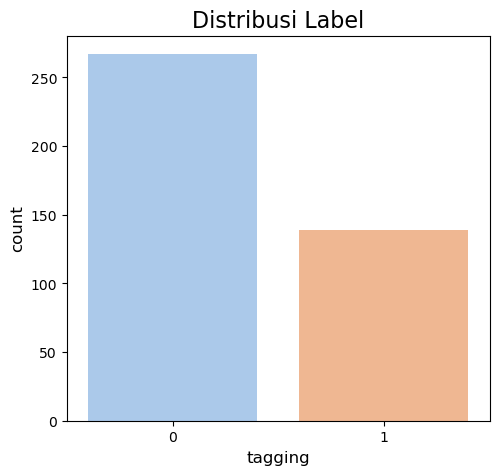

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['figure.figsize'] = (12,5)
plt.subplot(1,2,1)
sns.countplot(df['Label'], palette = 'pastel')
plt.title('Distribusi Label', fontsize = 16)
plt.xlabel('tagging', fontsize = 12)
plt.ylabel('count', fontsize = 12)

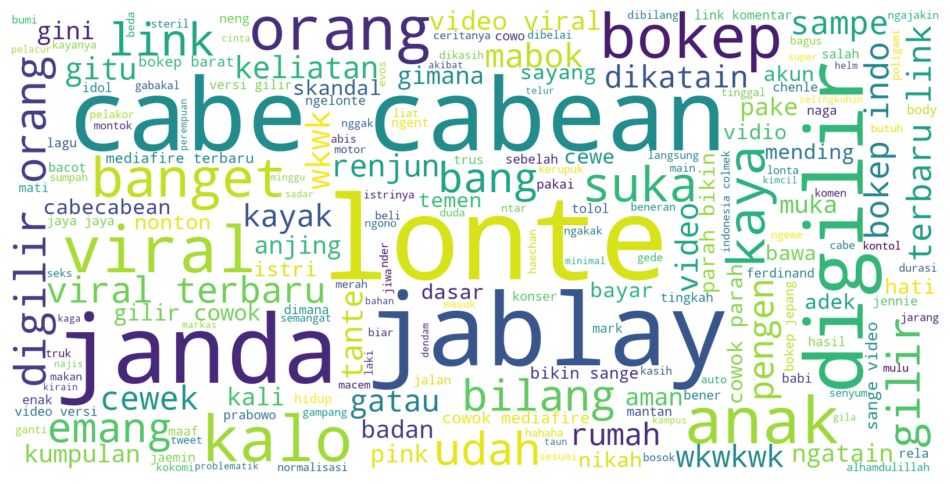

In [36]:
from wordcloud import WordCloud

import matplotlib.pyplot as plt

wordcloud = WordCloud(width=1600, height=800, max_font_size=200, background_color='white')

allWords = ' '.join([twts for twts in df['clean_joined']])
allWords

wordcloud.generate(allWords)

plt.figure(figsize=(12,10))

plt.imshow(wordcloud, interpolation='bilinear')

plt.axis("off")

plt.show()

In [40]:
df

,Datetime,Tweet Id,Text,Username,Label,lwr,filtering,clean_double_ws,clean,clean_joined,tweet_tokens_stemmed
0,2023-02-22 03:01:28+00:00,1.63e+18,"Dalam urusan cinta, jgn bereaksi terlalu berle...",infogarsela,0,"dalam urusan cinta, jgn bereaksi terlalu berle...",dalam urusan cinta jgn bereaksi terlalu berle...,dalam urusan cinta jgn bereaksi terlalu berleb...,"[urusan, cinta, bereaksi, menghadapi, contohla...",urusan cinta bereaksi menghadapi contohlah cab...,"[urus, cinta, reaksi, hadap, contoh, cabe, cab..."
1,2023-02-22 02:46:17+00:00,1.63e+18,@treasuremenfess Cabe cabean wkwkwkkw,spitfaierdregen,0,@treasuremenfess cabe cabean wkwkwkkw,cabe cabean wkwkwkkw,cabe cabean wkwkwkkw,"[cabe, cabean, wkwkwkkw]",cabe cabean wkwkwkkw,"[cabe, cabe, wkwkwkkw]"
2,2023-02-22 02:34:24+00:00,1.63e+18,@treasuremenfess cabe cabean,haruwize,0,@treasuremenfess cabe cabean,cabe cabean,cabe cabean,"[cabe, cabean]",cabe cabean,"[cabe, cabe]"
3,2023-02-22 02:29:23+00:00,1.63e+18,"@jungnaa19 Istrinya dah tulus, malah cari cabe...",ryh_seven,0,"@jungnaa19 istrinya dah tulus, malah cari cabe...",istrinya dah tulus malah cari cabecabean,istrinya dah tulus malah cari cabecabean,"[istrinya, tulus, cari, cabecabean]",istrinya tulus cari cabecabean,"[istri, tulus, cari, cabecabean]"
4,2023-02-22 02:12:03+00:00,1.63e+18,@flywithasoka @tanyakanrl Knp si cowo baik gin...,Itsyourqueens,0,@flywithasoka @tanyakanrl knp si cowo baik gin...,knp si cowo baik gini hrs ktemu ama cabe cabean,knp si cowo baik gini hrs ktemu ama cabe cabean,"[cowo, gini, ktemu, cabe, cabean]",cowo gini ktemu cabe cabean,"[cowo, gin, ktemu, cabe, cabe]"
...,...,...,...,...,...,...,...,...,...,...,...
401,2023-03-07 13:32:06+00:00,1.63e+18,@_xlero Emg rada jablay sih tapi gmn yahhh,devilsmete,0,@_xlero emg rada jablay sih tapi gmn yahhh,emg rada jablay sih tapi gmn yahhh,emg rada jablay sih tapi gmn yahhh,"[rada, jablay, yahhh]",rada jablay yahhh,"[rada, jablay, yahhh]"
402,2023-03-07 13:27:48+00:00,1.63e+18,"No offense, bodyshaming my ass idgaf. But dia ...",chionofille,1,"no offense, bodyshaming my ass idgaf. but dia ...",no offense bodyshaming my ass idgaf but dia ...,no offense bodyshaming my ass idgaf but dia cl...,"[offense, bodyshaming, idgaf, clearly, looks, ...",offense bodyshaming idgaf clearly looks freaki...,"[offense, bodyshaming, idgaf, clearly, looks, ..."
403,2023-03-07 13:13:45+00:00,1.63e+18,@vdlito eh jablay tbtb kangen mabar!! kmnsi loe,aquijat,1,@vdlito eh jablay tbtb kangen mabar!! kmnsi loe,eh jablay tbtb kangen mabar kmnsi loe,eh jablay tbtb kangen mabar kmnsi loe,"[jablay, tbtb, kangen, mabar, kmnsi]",jablay tbtb kangen mabar kmnsi,"[jablay, tbtb, kangen, mabar, kmnsi]"
404,2023-03-07 13:08:26+00:00,1.63e+18,Coba kalau aku ‚Äöapaan si ni orang jablay bgt,tanahhhh_abang,0,coba kalau aku ‚äöapaan si ni orang jablay bgt,coba kalau aku apaan si ni orang jablay bgt,coba kalau aku apaan si ni orang jablay bgt,"[coba, orang, jablay]",coba orang jablay,"[coba, orang, jablay]"


In [46]:
data1 = df[df["Label"] == 1]

In [47]:
data1

,Datetime,Tweet Id,Text,Username,Label,lwr,filtering,clean_double_ws,clean,clean_joined,tweet_tokens_stemmed
20,2023-02-21 13:35:20+00:00,1.63e+18,permasalahan idup gue ga jauh jauh dari dikata...,rirypham,1,permasalahan idup gue ga jauh jauh dari dikata...,permasalahan idup gue ga jauh jauh dari dikata...,permasalahan idup gue ga jauh jauh dari dikata...,"[permasalahan, idup, dikatain, lonte, cabe, ca...",permasalahan idup dikatain lonte cabe cabean cowo,"[masalah, idup, dikatain, lonte, cabe, cabe, c..."
30,2023-02-21 05:01:31+00:00,1.63e+18,"@ruangtulisku Gak seru, gak bisa bisa godain c...",dahwahju,1,"@ruangtulisku gak seru, gak bisa bisa godain c...",gak seru gak bisa bisa godain cabecabean,gak seru gak bisa bisa godain cabecabean,"[seru, godain, cabecabean]",seru godain cabecabean,"[seru, godain, cabecabean]"
37,2023-02-21 00:52:26+00:00,1.63e+18,yaAllah back then i was bodyshamed by my frien...,damuselette,1,yaallah back then i was bodyshamed by my frien...,yaallah back then i was bodyshamed by my frien...,yaallah back then i was bodyshamed by my frien...,"[yaallah, bodyshamed, friend, getting, called,...",yaallah bodyshamed friend getting called badan...,"[yaallah, bodyshamed, friend, getting, called,..."
38,2023-02-20 20:04:01+00:00,1.63e+18,@MamahSiskaa Hy cabe cabean,Ayono12174882,1,@mamahsiskaa hy cabe cabean,hy cabe cabean,hy cabe cabean,"[cabe, cabean]",cabe cabean,"[cabe, cabe]"
39,2023-02-20 19:12:01+00:00,1.63e+18,@oblxteration @indigolourve Ollo macem cabe ca...,mechantefleur,1,@oblxteration @indigolourve ollo macem cabe ca...,ollo macem cabe cabean,ollo macem cabe cabean,"[ollo, macem, cabe, cabean]",ollo macem cabe cabean,"[ollo, macem, cabe, cabe]"
...,...,...,...,...,...,...,...,...,...,...,...
380,2023-03-07 14:36:33+00:00,1.63e+18,@biohelly Hi jablay,bukansenudes,1,@biohelly hi jablay,hi jablay,hi jablay,[jablay],jablay,[jablay]
398,2023-03-07 13:54:09+00:00,1.63e+18,"@barudakspapi Jeni, mantan jablay kosan. Setah...",LarasBambang,1,"@barudakspapi jeni, mantan jablay kosan. setah...",jeni mantan jablay kosan setahun bunting x...,jeni mantan jablay kosan setahun bunting x ana...,"[jeni, mantan, jablay, kosan, setahun, bunting...",jeni mantan jablay kosan setahun bunting anak ...,"[jeni, mantan, jablay, kosan, tahun, bunting, ..."
400,2023-03-07 13:36:15+00:00,1.63e+18,@tanyakanrl Apasih? Jablay banget jadi cowo..,Lalalalassitude,1,@tanyakanrl apasih? jablay banget jadi cowo..,apasih jablay banget jadi cowo,apasih jablay banget jadi cowo,"[apasih, jablay, banget, cowo]",apasih jablay banget cowo,"[apasih, jablay, banget, cowo]"
402,2023-03-07 13:27:48+00:00,1.63e+18,"No offense, bodyshaming my ass idgaf. But dia ...",chionofille,1,"no offense, bodyshaming my ass idgaf. but dia ...",no offense bodyshaming my ass idgaf but dia ...,no offense bodyshaming my ass idgaf but dia cl...,"[offense, bodyshaming, idgaf, clearly, looks, ...",offense bodyshaming idgaf clearly looks freaki...,"[offense, bodyshaming, idgaf, clearly, looks, ..."


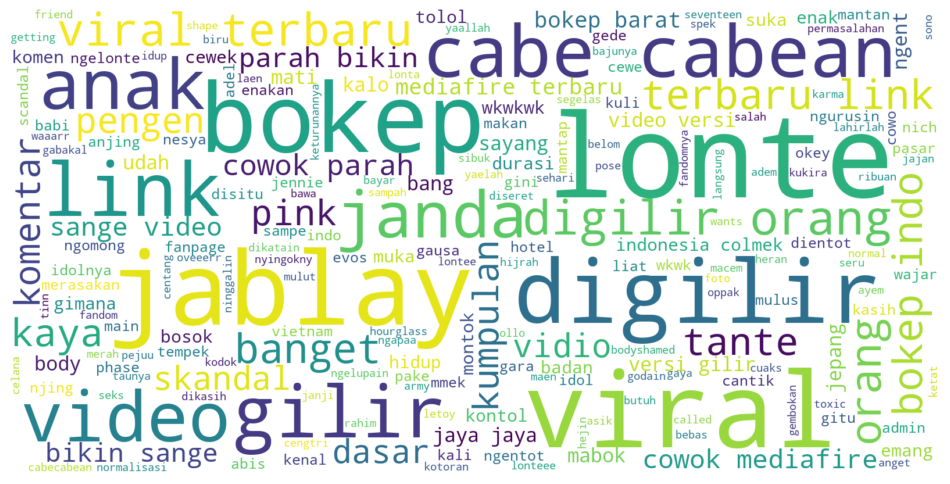

In [49]:
allWords1 = ' '.join([twts for twts in data1['clean_joined']])
allWords1
wordcloud1.generate(allWords1)
wordcloud1 = WordCloud(width=1600, height=800, max_font_size=200, background_color='white')

wordcloud1.generate(allWords1)

plt.figure(figsize=(12,10))

plt.imshow(wordcloud1, interpolation='bilinear')

plt.axis("off")

plt.show()

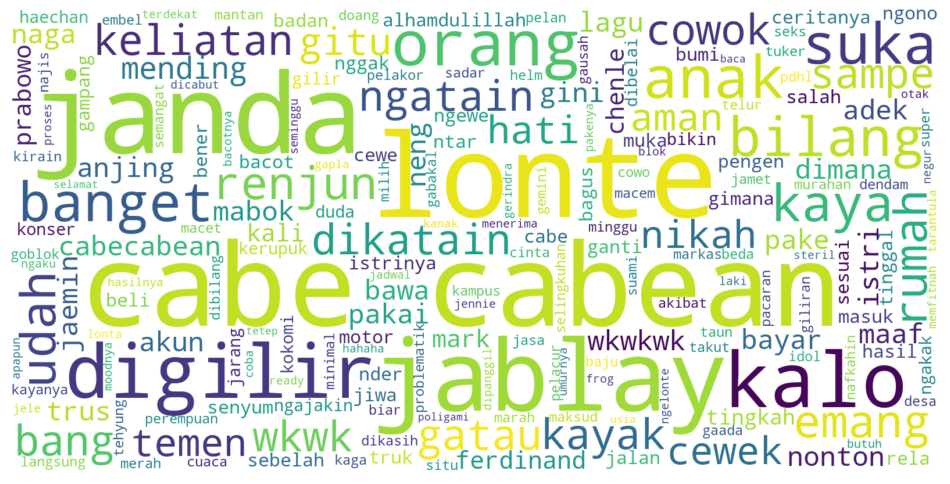

In [51]:
data2 = df[df["Label"] == 0]

allWords2 = ' '.join([twts for twts in data2['clean_joined']])
allWords2

wordcloud2 = WordCloud(width=1600, height=800, max_font_size=200, background_color='white')

wordcloud2.generate(allWords2)

plt.figure(figsize=(12,10))

plt.imshow(wordcloud2, interpolation='bilinear')

plt.axis("off")

plt.show()

### Split Data and Padding

In [53]:
random_state = 42

In [54]:
# split data into test and train 
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(df.tweet_tokens_stemmed, df.Label, test_size = 0.2)

In [55]:
# Create a tokenizer to tokenize the words and create sequences of tokenized words
tokenizer = Tokenizer(num_words = total_words)
tokenizer.fit_on_texts(x_train)
train_sequences = tokenizer.texts_to_sequences(x_train)
test_sequences = tokenizer.texts_to_sequences(x_test)

In [56]:
len(train_sequences)

324

In [57]:
len(test_sequences)

82

In [58]:
print("The encoding for document\n",df.clean_joined[0],"\n is : ",train_sequences[0])

The encoding for document
 urusan cinta bereaksi menghadapi contohlah cabe cabean kambuhan cabe cabean kalo motor nganggur selaw hidupnya 
 is :  [309, 310, 3, 18, 311, 29]


In [59]:
# Add padding can either be maxlen = 4406 or smaller number maxlen = 40 seems to work well based on results
# Make sure all different samples have the same length (fillted 0 s for missing)
padded_train = pad_sequences(train_sequences,maxlen = 40, padding = 'post', truncating = 'post')
padded_test = pad_sequences(test_sequences,maxlen = 40, truncating = 'post') 

In [60]:
for i,doc in enumerate(padded_train[:2]):
     print("The padded encoding for document",i+1," is : ",doc)

The padded encoding for document 1  is :  [309 310   3  18 311  29   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0]
The padded encoding for document 2  is :  [312   2   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0]


## Embeding

In [61]:
# Sequential Model
model = Sequential()

# embeddidng layer
model.add(Embedding(total_words, output_dim = 128))
# model.add(Embedding(total_words, output_dim = 240))


# Bi-Directional RNN and LSTM
model.add(LSTM(64)) # no of neurons

# Dense layers
model.add(Dense(1,activation= 'sigmoid')) # reason: we do binary classification here
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])
model.summary()

2023-06-22 01:54:50.832230: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 128)         184064    
                                                                 
 lstm (LSTM)                 (None, 64)                49408     
                                                                 
 dense (Dense)               (None, 1)                 65        
                                                                 
Total params: 233,537
Trainable params: 233,537
Non-trainable params: 0
_________________________________________________________________


In [62]:
from sklearn.metrics import classification_report

In [63]:
x_test

74     [adil, muda, habis, bucin, cowo, kpop, ngebuci...
35          [maaf, darah, cabe, cabe, emang, suka, ulah]
242                      [piara, janda, omelin, bininye]
245                                       [mabok, janda]
125    [gatau, lonte, wkwk, seks, nikah, lonte, gitu,...
                             ...                        
110    [muka, hidup, kaya, lonte, sampah, mulut, hari...
123    [nama, muka, hijab, tubuh, leceh, kimcil, syar...
99     [nambahin, embel, embel, lonte, gatau, benci, ...
273                                [mamak, janda, gamau]
334            [mahal, beli, jablay, gitu, money, class]
Name: tweet_tokens_stemmed, Length: 82, dtype: object

In [64]:
y_test

74     0
35     0
242    0
245    0
125    0
      ..
110    1
123    1
99     0
273    0
334    0
Name: Label, Length: 82, dtype: int64

In [65]:
total_words

1438

In [66]:
y_train = np.asarray(y_train)

In [67]:
# train the model
model.fit(padded_train, y_train, batch_size = 64, validation_split = 0.1, epochs = 2)

Epoch 1/2
5/5 [==============================] - 2s 131ms/step - loss: 0.6909 - acc: 0.5326 - val_loss: 0.6708 - val_acc: 0.6667
Epoch 2/2
5/5 [==============================] - 0s 31ms/step - loss: 0.6629 - acc: 0.6426 - val_loss: 0.6428 - val_acc: 0.6667


## model perfomance

In [68]:
# make prediction
pred = model.predict(padded_test)

3/3 [==============================] - 0s 7ms/step


In [238]:
# if the predicted value is >0.5 it is real else it is fake
prediction = []
for i in range(len(pred)):
    if pred[i].item() > 0.5:
        prediction.append(1)
    else:
        prediction.append(0)

In [239]:
# getting the accuracy
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(list(y_test), prediction)

print("Model Accuracy : ", accuracy)

Model Accuracy :  0.6829268292682927


## LSTM MODEL

In [240]:
print(classification_report(y_test, prediction, labels=np.unique(prediction)))

              precision    recall  f1-score   support

           0       0.67      1.00      0.80        52
           1       1.00      0.13      0.24        30

    accuracy                           0.68        82
   macro avg       0.83      0.57      0.52        82
weighted avg       0.79      0.68      0.59        82



## Vanilla RNN

In [284]:
from keras.layers import Activation, SimpleRNN
# Sequential Model
model2 = Sequential()

# embeddidng layer
model2.add(Embedding(total_words, output_dim = 128))
# model.add(Embedding(total_words, output_dim = 240))


# Bi-Directional RNN and LSTM
model2.add(SimpleRNN(64)) # no of neurons

# Dense layers
model2.add(Dense(1,activation= 'sigmoid')) # reason: we do binary classification here
model2.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])
model2.summary()

Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_15 (Embedding)    (None, None, 128)         184064    
                                                                 
 simple_rnn_6 (SimpleRNN)    (None, 64)                12352     
                                                                 
 dense_16 (Dense)            (None, 1)                 65        
                                                                 
Total params: 196,481
Trainable params: 196,481
Non-trainable params: 0
_________________________________________________________________


In [285]:
model2.fit(padded_train, y_train, batch_size = 64, validation_split = 0.1, epochs = 2)

Epoch 1/2
4/4 [==============================] - 1s 72ms/step - loss: 0.6393 - acc: 0.6735 - val_loss: 0.7106 - val_acc: 0.5758
Epoch 2/2
4/4 [==============================] - 0s 17ms/step - loss: 0.5911 - acc: 0.6907 - val_loss: 0.6728 - val_acc: 0.5758


In [286]:
# make prediction
pred2 = model2.predict(padded_test)

3/3 [==============================] - 0s 3ms/step


In [287]:
# if the predicted value is >0.5 it is real else it is fake
prediction2 = []
for i in range(len(pred2)):
    if pred2[i].item() > 0.5:
        prediction2.append(1)
    else:
        prediction2.append(0)

In [288]:
# getting the accuracy
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(list(y_test), prediction2)

print("Model Accuracy : ", accuracy)

Model Accuracy :  0.6219512195121951


In [289]:
print(classification_report(y_test, prediction2, labels=np.unique(prediction2)))

              precision    recall  f1-score   support

           0       0.63      0.96      0.76        52
           1       0.33      0.03      0.06        30

    accuracy                           0.62        82
   macro avg       0.48      0.50      0.41        82
weighted avg       0.52      0.62      0.51        82

